======= For International Students ======= 
Write a program to construct dictionary of corpus EnglishDataset_Assignment1.txt. (there are 25000 IMDB movie reviews) You have to do:
 - Preprocessing: tokenization, stopword removal, remove punctuation, and stemming (simple normalization if needed).
 - Sort terms by term frequency and draw a figure to prof they follow Zipf‘s law (long-tail distribution). 
 - Rank terms by global TF-IDF.
 - Save the result as a txt file. 


# Preprocessing Data

## Import all needed packages
Please install all packages first

!!! Use `nltk.download()` to download all NLTK dataset to 'C:\nltk_data' if you don't have

Please refer to this link: https://www.nltk.org/data.html

In [5]:
import csv
import operator
import nltk
#import os
import string
#import inflect
#import logging
#import numpy, matplotlib
#import math
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
#from matplotlib import pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.probability import FreqDist

## Read data

In [2]:
with open('task2_trainset.csv', encoding='utf-8') as f:
    data = f.read().split('\n')
    data = data[:len(data)-1] #Clear last null row
    f.close()
    
data = [row for row in csv.reader(data, quotechar='"', delimiter=',',quoting=csv.QUOTE_ALL, skipinitialspace=True)]
data = pd.DataFrame(data[1:], columns = data[0]) #Transform to Pandas DataFrame




## Tokenization by using NLTK 

In [3]:
def tokenize_word(sentence):
    return nltk.word_tokenize(sentence)

def lowercase(words):
    return str(words).lower()

#tokenize abstract and title
data['Title_tokenized'] = [tokenize_word(lowercase(data['Title'][i])) for i in range(len(data))]
data['Abstract_tokenized'] = [tokenize_word(lowercase(data['Abstract'][i])) for i in range(len(data))]



## Normalization
1. Remove punctuation and whitespace words
2. Replace number
3. Remove stop words
4. Stemming
5. Lemmatization

In [6]:
def remove_punctuation_whitespace(words): #Remove all punctuation and whitespace characters
    pun_and_ws = string.punctuation+string.whitespace
    new_words = [''.join(c for c in w if c not in pun_and_ws) for w in words]
    new_words = [w for w in new_words if w != '']
    return new_words

def replace_number(words): #Converse number to text. Eg: '1' to 'one'
    p = inflect.engine()
    new_words = [p.number_to_words(w) if w.isdigit() else w for w in words]
    return new_words

def remove_stopwords(words): #Remove stopwords by using nltk.corpus.stopwords
    stop_words = stopwords.words('english')
    new_words = [w for w in words if w not in stop_words]
    return new_words

# I decided to ignore stemming step because it caused a lot of bugs like: 'comedy' -> 'comedi'

def stem_words(words): #Porter seems to be better than Lancaster
    stemmer = LancasterStemmer()
    new_words = [stemmer.stem(w) for w in words]
    return new_words

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    new_words = [lemmatizer.lemmatize(w) for w in words]
    return new_words

def normalize(data):   
    #Remove punctuations and whitespaces
    data = [remove_punctuation_whitespace(words) for words in data]
    data = [remove_stopwords(words) for words in data]
    """
    words = [replace_number(w) for w in words]
    
    # words = [stem_words(w) for w in words] 
    # I decided to ignore stemming step because it caused a lot of bugs like: 'comedy' -> 'comedi'
    words = [lemmatize_verbs(w) for w in words]
    """
    return data

if __name__ == "__main__":
    data['Title_tokenized'] = normalize(data['Title_tokenized'])
    data['Abstract_tokenized'] = normalize(data['Abstract_tokenized'])


## TF-IDF Calculation

In [ ]:
def tfidf_vectorize(data):
    data = [list_to_string(d) for d in data]
    vectorizer = TfidfVectorizer(smooth_idf=True, analyzer='word', stop_words='english', max_df=0.9, max_features = 10000)
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense().tolist()
    data_vectors = pd.DataFrame(dense, columns=feature_names)
    return data_vectors

def list_to_string(words):
    return ' '.join(w for w in words)

if __name__ == "__main__":
    print(tfidf_vectorize(data['Abstract_tokenized']))

In [35]:
type(a[0].todense())

numpy.matrix

# Data Representation
1. Get a dic of word frequency. 
> Since there is the word 'would' in top 10, nltk.stopwords doesn't seem good
2. Plot a line chart, it's look like Zipf's law

Top 100 high frequency words: 
[('movie', 50933), ('film', 46359), ('nt', 33382), ('one', 28424), ('like', 20257), ('time', 15429), ('good', 14862), ('character', 14062), ('would', 13393), ('story', 12948), ('even', 12608), ('get', 12464), ('make', 11945), ('see', 11859), ('really', 11728), ('scene', 10473), ('well', 9808), ('much', 9693), ('could', 9395), ('people', 9354), ('bad', 9136), ('also', 9122), ('great', 9030), ('two', 8957), ('first', 8909), ('way', 8702), ('show', 8510), ('thing', 8188), ('made', 8083), ('think', 7719), ('life', 7656), ('go', 7485), ('watch', 7025), ('know', 7022), ('love', 6730), ('actor', 6709), ('many', 6666), ('plot', 6657), ('seen', 6646), ('end', 6553), ('look', 6497), ('say', 6496), ('never', 6442), ('year', 6423), ('acting', 6422), ('little', 6407), ('best', 6343), ('ever', 5890), ('better', 5707), ('man', 5676), ('come', 5649), ('take', 5641), ('still', 5627), ('work', 5500), ('part', 5150), ('find', 5074), ('something', 5012), ('want', 4984), ('gi

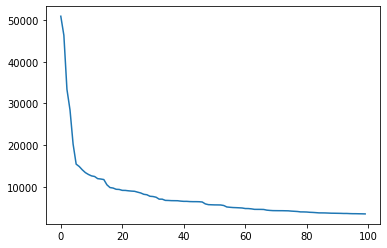

In [5]:
def nltk_freqdist(words):
    new_words = [small_w for w in words for small_w in w]
    return FreqDist(new_words)

def print_sorted_tf(tf, number):
    sorted_frequency = sorted(tf.items(), key = operator.itemgetter(1), reverse=True)
    print('Top {} high frequency words: \n{}\n'.format(number, sorted_frequency[0:number]))
    
def print_plot_freqdist(tf, number):
    x = range(number)
    y = sorted(list(tf.values()), reverse=True)[:number]
    print('Frequency Distribution: \n', plt.plot(x,y))
    
def get_tfidf(tf, words):
    tfidf = dict([(w,0) for w in tf.keys()])
    #Calculate df
    for w in words:
        distinct_w = set(w)
        for key in distinct_w:
            tfidf[key]+=1
    #Calculate idf & tfidf
    for key in tfidf:
        tfidf[key] = math.log10(len(words)/tfidf[key])
        tfidf[key] *= tf[key]
    return tfidf

def print_sorted_tfidf(tfidf, number):
    sorted_tfidf = sorted(tfidf.items(), key = operator.itemgetter(1), reverse=True)
    print('Top {} high TF-IDF words: \n{}\n'.format(number, sorted_tfidf[0:number]))
    return sorted_tfidf
        
if __name__ == "__main__":
    tf = nltk_freqdist(words) #I found this shorter way with nltk 
    print_sorted_tf(tf, 100)
    tfidf = get_tfidf(tf, words)
    sorted_tfidf = print_sorted_tfidf(tfidf, 100)
    print_plot_freqdist(tf, 100)

# Save file

In [8]:
#Write to file
data.to_csv('trainingdata_tokenized.csv', header=True, index=None)

In [7]:
data

,Id,Title,Abstract,Authors,Categories,Created Date,Task 2,Title_tokenized,Abstract_tokenized
0,D00001,A Brain-Inspired Trust Management Model to Ass...,Rapid popularity of Internet of Things (IoT) a...,Mahmud/Kaiser/Rahman/Rahman/Shabut/Al-Mamun/Hu...,cs.CR/cs.AI/q-bio.NC,2018-01-11,THEORETICAL,"[braininspired, trust, management, model, assu...","[rapid, popularity, internet, things, iot, clo..."
1,D00002,On Efficient Computation of Shortest Dubins Pa...,"In this paper, we address the problem of compu...",Sadeghi/Smith,cs.SY/cs.RO/math.OC,2016-09-21,THEORETICAL,"[efficient, computation, shortest, dubins, pat...","[paper, address, problem, computing, optimal, ..."
2,D00003,Data-driven Upsampling of Point Clouds,High quality upsampling of sparse 3D point clo...,Zhang/Jiang/Yang/Yamakawa/Shimada/Kara,cs.CV,2018-07-07,ENGINEERING,"[datadriven, upsampling, point, clouds]","[high, quality, upsampling, sparse, 3d, point,..."
3,D00004,Accessibility or Usability of InteractSE? A He...,Internet is the main source of information now...,Aqle/Khowaja/Al-Thani,cs.HC,2018-08-29,EMPIRICAL,"[accessibility, usability, interactse, heurist...","[internet, main, source, information, nowadays..."
4,D00005,Spatio-Temporal Facial Expression Recognition ...,Automated Facial Expression Recognition (FER) ...,Hasani/Mahoor,cs.CV,2017-03-20,ENGINEERING,"[spatiotemporal, facial, expression, recogniti...","[automated, facial, expression, recognition, f..."
5,D00006,Continuous Semantic Topic Embedding Model Usin...,This paper proposes the continuous semantic to...,Jung/Choi,stat.ML/cs.CL/cs.LG,2017-11-24,THEORETICAL EMPIRICAL,"[continuous, semantic, topic, embedding, model...","[paper, proposes, continuous, semantic, topic,..."
6,D00007,Beyond Shared Hierarchies: Deep Multitask Lear...,Existing deep multitask learning (MTL) approac...,Meyerson/Miikkulainen,cs.LG/cs.AI/stat.ML,2017-10-31,THEORETICAL EMPIRICAL,"[beyond, shared, hierarchies, deep, multitask,...","[existing, deep, multitask, learning, mtl, app..."
7,D00008,Using Scalp Electrical Biosignals to Control a...,In this paper we explore the use of electrical...,George/Lotte/Abad/Lécuyer,cs.OH,2011-11-08,ENGINEERING EMPIRICAL,"[using, scalp, electrical, biosignals, control...","[paper, explore, use, electrical, biosignals, ..."
8,D00009,Robustness from structure: Inference with hier...,How spiking networks are able to perform proba...,Petrovici/Schroeder/Breitwieser/Grübl/Schemmel...,q-bio.NC/cs.NE/stat.ML,2017-03-12,ENGINEERING EMPIRICAL,"[robustness, structure, inference, hierarchica...","[spiking, networks, able, perform, probabilist..."
9,D00010,Statistical Mechanical Analysis of Low-Density...,Low-density parity-check (LDPC) codes on symme...,Mori/Tanaka,cs.IT/math.IT,2011-10-10,THEORETICAL,"[statistical, mechanical, analysis, lowdensity...","[lowdensity, paritycheck, ldpc, codes, symmetr..."
